<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/logo_CV.jpeg" style="width:1500px;heigth:100px">

# <center> 07. Keypoint Features </center>


### "Edges find brightness discontinuities in an image, features find distinctive regions."



## <span style="color:red"> Outline </span> 

1. **From interest point to relevant Local Features**
2. **Finding corners: keypoints**
3. **Harris corner detector: keypoint detector**


In [1]:
import cv2 as cv
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## <span style="color:green"> If you are in colaboratoy </span>: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive/cv-uis-student/notebooks
!pwd

## <span style="color:red"> 1.  From interest point to relevant Local Features </span> 


The goal is to find reliably detectable and discriminative locations in different images. Each feature is: well localted (**position**) and distinctive (asociated **descriptor**), therefore could be well matched among other images. 

**Applications**
- match and aling images
- follow interesting points along video
- achieve not-dense representations
- Characterize and object from few but relevant points
    -object recognition
    -image retriveal

<img src="../imgs/match2.jpg" style="width:400px">

## Good features

- Repeteability/precision: the same feature can be found  in several images despite geometric and photometric transformations. 
- saliency/matchability: each feature has a distintive descriptor. 
- Compactness/efficiency: many fewer features than image pixels
- Localilty: a feature occupies a relative small area of the image, robust to oclussion

## <span style="color:red"> 2.  Finding corners: keypoints </span> 


One of the earlier corner detectors was introduced by Harris, and it is still a very effective corner detector used  a lot

- Properly speaking the Harris Corner detection is more like a Sobel operator, it is a filter which gives a strong response on corner-like regions of the image.


-**For each good feature we need to*localize and describe. **

- flatt regions are not interesting..
- edges are not interesting because along the axis of derivative not change
- cornes are pretty good!


What is important to localize point??

<img src="../imgs/corner.png" style="width:300px">



## <span style="color:red"> 3.  Harris corner detector: keypoint detector </span> 



*Detect discriminating features in an image and find the best matching features in other images.*

- For each point consider a windows of pixels
- compute the Harris matrix, defined as: 

$$E(u,v) = \sum_p w_p [ I(x+u, y+v)-I(x,y)]^{2}$$

being $p = (x,y)$. We need to maximize the second term. Using taylor expansion, and so on, we can approximate a solution, as: 


$$E(u,v) =  E(0,0) + \left [ u, v \right ] \begin{bmatrix}
E_u(0,0)\\ 
E_v(0,0)
\end{bmatrix}  + \frac{1}{2}\left [ u, v \right ]  
\begin{bmatrix}
E_{uu}(0,0) & E_{vu}(0,0)\\ 
E_{uv}(0,0) & E_{vv}(0,0) 
\end{bmatrix}
\begin{bmatrix}
u\\ 
v
\end{bmatrix}
$$

$$E(u,v) \approx  \left [ u, v \right ] H \begin{bmatrix}
u\\ 
v
\end{bmatrix}$$

**(Did you remember LK-optical flow constraint? .... It is the same principle!!)**

So, H can be descomposed as: 

$$
H = \sum_{p}w_p \nabla I_p(\nabla I_p)^{T} = \sum_{p} w_p\begin{pmatrix}
I_{xp}^{2} & I_{xp}I_{yp}\\ 
I_{xp}I_{yp} & I_{yp}^{2} 
\end{pmatrix}
$$

that can be writted as: 

$$
H =\begin{pmatrix}
\sum_{p} w_p I_{xp}^{2} & \sum_{p} w_p I_{xp}I_{yp}\\ 
\sum_{p} w_p I_{xp}I_{yp} & \sum_{p} w_p I_{yp}^{2} 
\end{pmatrix}
$$
 - the weigths $w_p$ are circular symetric of **$9 \times 9$** Gaussian
 - Then, for each point, we choose the $c>th$, being $c$:
 $$c = det(H) - K (trace(H))^{2} $$, k=0,1 [2](https://en.wikipedia.org/wiki/Trace_(linear_algebra))
 
 - $\lambda_1, \lambda_2$ are the eigenvalues of H. $\lambda_i$ is related with the amount of increasing on direction i
 - $det(H) = \lambda_1 \lambda_2$
 - $trace(H) = \lambda_1 + \lambda_2$
    
    

There is different possibilities for c, which define if correspond to an **interesting point**

- |c| is small because λ1 and λ2 are small. So the region is flat.
- c<0, because λi>>λj. So, the region is edge.
- c is large, because λ1 and λ2 are large and λ1∼λ2. **So, the region is a corner!!**


<img src="../imgs/cornereigen.png" style="width:300px">

**Go to the action! **

Harris output from the cell before thresholding

In [2]:
blocksize=4  
kernel_size=3

I_col1 = cv.cvtColor(cv.imread("../data/image_set/butterfly/image_0007.jpg"), cv.COLOR_RGB2BGR)
I_gra1 = cv.cvtColor(I_col1, cv.COLOR_RGB2GRAY)

dst = cv.cornerHarris(I_gra1,blocksize,kernel_size,0.05)

plt.imshow(dst, cmap = 'gray');

Now, we can drawn the points over the images

In [3]:
I_col2 = cv.cvtColor(cv.imread("../data/image_set/brain/image_0015.jpg"), cv.COLOR_RGB2BGR)
I_gra2 = cv.cvtColor(I_col2, cv.COLOR_RGB2GRAY)

dst2 = cv.cornerHarris(I_gra2,blocksize,kernel_size,0.05) 

I_col1[dst>0.01*dst.max()]=[0,0,255]
I_col2[dst2>0.01*dst2.max()]=[0,0,255]

plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(cv.cvtColor(I_col1, cv.COLOR_BGR2RGB)),plt.title('Butterfly')
plt.xticks([]), plt.yticks([]);
plt.subplot(122),plt.imshow(cv.cvtColor(I_col2, cv.COLOR_BGR2RGB)),plt.title('Brain')
plt.xticks([]), plt.yticks([]);

**Threshold algorithm **

1. Compute Gaussian derivatives
2. Compute matrix H
3. Compute corner responses $c$
4. Threshold $c$
5. Find local of response (non-maxima suppresion)

## <span style="color:orange">student challenge</span>: 

From image of `checkerboard.png` evaluates the performance of harris detector, regarding: 

- Threshold
- Kernel size
- block size

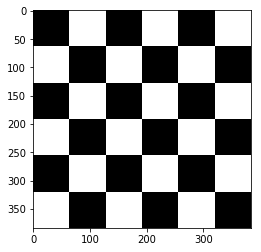

In [4]:
blocksize=4  
kernel_size=3
I_cb = cv.cvtColor(cv.imread("../imgs/checkerboard.png"), cv.COLOR_RGB2GRAY)
plt.imshow(I_cb,cmap = 'gray');

1. Cambiando los valores del threshold de harris. Utilice la herramienta interact para cambiar cada 0.01 o 0.001

Remember: 

$$c = \lambda_{1}\lambda_{2} + K(\lambda_{1} + \lambda_{2})^{2}$$

- If only one $\lambda_i$ is larger we are face to and edge
- If both $\lambda$'s  are small, we are in a flat region
- K is namely between 0.04 to 0.06

2 Cambiando los valores del kernel size. Utilice la herramienta interact para cambiar de 3- 30

3 Cambiando el block size. Utilice la herramienta interact para cambiar cada [4-50]

**Evaluating the variant/invariant properties**

- Rotate the `butterfly image` 30 degrees, several times (almost 4 times) and compare the resultant corners of Harris


**Invariant to rotation**
# 👍


- Translate the `butterfly image` 15 pixels, several times (almost 4 times) and compare the resultant corners of Harris

**Invariant to translation**
# 👍 

- Now scale the image several times and observe the harris responses

- **Variant to Scaling**
# 👎

# References

[1 Features in 2D](https://docs.opencv.org/3.1.0/db/d27/tutorial_py_table_of_contents_feature2d.html)

[2 Harris features](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html)

[3 Trace](https://en.wikipedia.org/wiki/Trace_(linear_algebra)

[4. C.Harris	and	M.Stephens.	“A	Combined	Corner	and	Edge	Detector.”	Proceedings	
of	the	4th	Alvey	Vision	Conference:	pages	147—151,	1988.		](http://www.bmva.org/bmvc/1988/avc-88-023.pdf)


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/bannerThanks.jpg" style="width:1000px;">